### 6주차 과제 수정본 ( car_evaluation_pytorch의 모델을 참고한 회귀와 분류 )
과제 리뷰 후 수정한 코드

Epoch 1/20 | Loss: 0.6371 | Accuracy: 75.97%
Epoch 2/20 | Loss: 0.5634 | Accuracy: 77.27%
Epoch 3/20 | Loss: 0.5213 | Accuracy: 79.22%
Epoch 4/20 | Loss: 0.5013 | Accuracy: 78.57%
Epoch 5/20 | Loss: 0.4783 | Accuracy: 79.87%
Epoch 6/20 | Loss: 0.4799 | Accuracy: 80.52%
Epoch 7/20 | Loss: 0.4754 | Accuracy: 79.87%
Epoch 8/20 | Loss: 0.4474 | Accuracy: 79.22%
Epoch 9/20 | Loss: 0.4597 | Accuracy: 79.87%
Epoch 10/20 | Loss: 0.4743 | Accuracy: 81.17%
Epoch 11/20 | Loss: 0.4518 | Accuracy: 79.22%
Epoch 12/20 | Loss: 0.4537 | Accuracy: 81.17%
Epoch 13/20 | Loss: 0.4358 | Accuracy: 79.87%
Epoch 14/20 | Loss: 0.4382 | Accuracy: 79.87%
Epoch 15/20 | Loss: 0.4186 | Accuracy: 80.52%
Epoch 16/20 | Loss: 0.4313 | Accuracy: 80.52%
Epoch 17/20 | Loss: 0.4273 | Accuracy: 81.82%
Epoch 18/20 | Loss: 0.4180 | Accuracy: 79.87%
Epoch 19/20 | Loss: 0.4110 | Accuracy: 81.82%
Epoch 20/20 | Loss: 0.4218 | Accuracy: 80.52%

Classification Report:
Confusion Matrix:
 [[93 14]
 [16 31]]
F1 Score: 0.67
Precision: 0

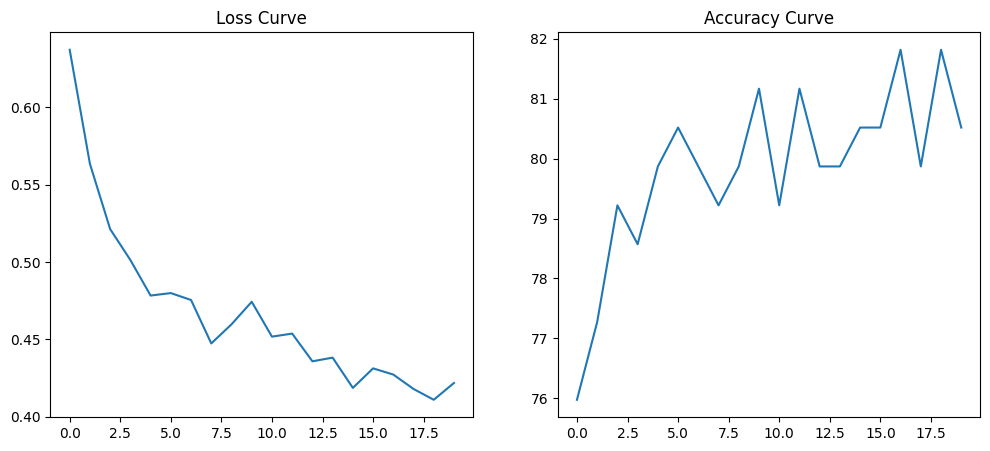

Epoch 1/20 | Loss: 1085.8505
Epoch 2/20 | Loss: 1024.3006
Epoch 3/20 | Loss: 971.5849
Epoch 4/20 | Loss: 849.4736
Epoch 5/20 | Loss: 683.9315
Epoch 6/20 | Loss: 486.4151
Epoch 7/20 | Loss: 306.2238
Epoch 8/20 | Loss: 181.4902
Epoch 9/20 | Loss: 119.1163
Epoch 10/20 | Loss: 99.6295
Epoch 11/20 | Loss: 88.4302
Epoch 12/20 | Loss: 80.3275
Epoch 13/20 | Loss: 76.4911
Epoch 14/20 | Loss: 77.9217
Epoch 15/20 | Loss: 73.1560
Epoch 16/20 | Loss: 70.1699
Epoch 17/20 | Loss: 67.3616
Epoch 18/20 | Loss: 67.7637
Epoch 19/20 | Loss: 66.1065
Epoch 20/20 | Loss: 64.0958

Regression Report:
MSE: 70.76
RMSE: 8.41
MAE: 6.28
R2 Score: -0.19


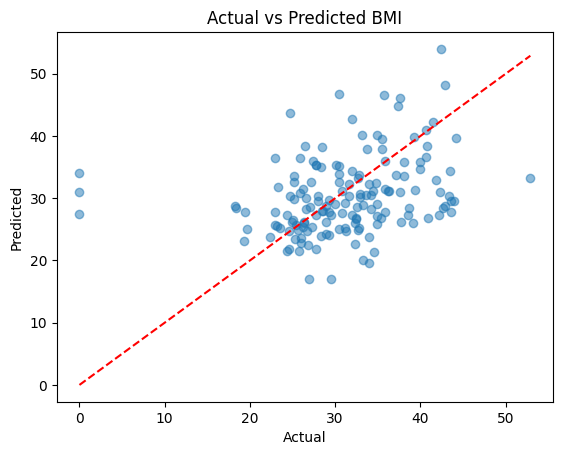

In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 데이터 로드
data = pd.read_csv('./diabetes.csv')

##############################################################################
### 1. 이진분류: Outcome 예측 ###
##############################################################################

# 데이터 분리 및 전처리
X = data.drop('Outcome', axis=1).values  # 특징 데이터 (8개 컬럼)
y = data['Outcome'].values               # 타겟 레이블

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# PyTorch 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델 정의 (입력 8, 출력 2)
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 이진분류
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = ClassificationModel()
criterion = nn.CrossEntropyLoss()  # 분류용 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
train_losses = []
test_accuracies = []

for epoch in range(20):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 에포크별 평균 손실 저장
    train_losses.append(running_loss / len(train_loader))
    
    # 테스트 정확도 계산
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Epoch {epoch+1}/20 | Loss: {train_losses[-1]:.4f} | Accuracy: {accuracy:.2f}%')

# 평가
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

print('\nClassification Report:')
print('Confusion Matrix:\n', confusion_matrix(all_labels, all_preds))
print(f'F1 Score: {f1_score(all_labels, all_preds):.2f}')
print(f'Precision: {precision_score(all_labels, all_preds):.2f}')
print(f'Recall: {recall_score(all_labels, all_preds):.2f}')

# 학습 곡선 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.title('Loss Curve')
plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy Curve')
plt.show()

##############################################################################
### 2. 회귀: BMI 예측 ###
##############################################################################

# 데이터 재설정
X = data.drop(['BMI', 'Outcome'], axis=1).values  # 특징 데이터 (7개 컬럼)
y = data['BMI'].values                            # 타겟 값

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# PyTorch 텐서 변환 (차원 확장)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# DataLoader 생성
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 모델 정의 (입력 7, 출력 1)
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 회귀
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = RegressionModel()
criterion = nn.MSELoss()  # 회귀용 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
train_losses = []
for epoch in range(20):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch+1}/20 | Loss: {train_losses[-1]:.4f}')

# 평가
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        all_preds.extend(outputs.numpy())
        all_labels.extend(labels.numpy())

print('\nRegression Report:')
print(f'MSE: {mean_squared_error(all_labels, all_preds):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(all_labels, all_preds)):.2f}')
print(f'MAE: {mean_absolute_error(all_labels, all_preds):.2f}')
print(f'R2 Score: {r2_score(all_labels, all_preds):.2f}')

# 실제값 vs 예측값 시각화
plt.scatter(all_labels, all_preds, alpha=0.5)
plt.plot([min(all_labels), max(all_labels)], [min(all_labels), max(all_labels)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted BMI')
plt.show()